In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import os

In [22]:
os.chdir("C:\\Users\\Nilesh\\Documents\\GitHub\\07 USA Housing Selling Price Prediction")
df = pd.read_csv("USA_Housing_FS.csv")
df

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Area_Population,Price,Address
0,79545.45857,5.682861,7.009188,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


## Encoding Categorical Variables

In [23]:
te = TargetEncoder()
te.fit(X=df['Address'],y=df['Price'])
df['Address_mean_encoded'] = te.transform(df['Address'])

C:\Users\Nilesh\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Nilesh\anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [24]:
pickle.dump(te, open('Address_te.pkl','wb'))

In [25]:
df.tail(50)

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Area_Population,Price,Address,Address_mean_encoded
4950,7.669554e+04,6.588424e+00,8.382505e+00,1.890467e+04,1.485913e+06,"80970 Montes Loop\nPort Katie, AL 25329-3838",1.230479e+06
4951,6.431130e+04,5.472332e+00,6.133704e+00,1.942043e+04,6.961393e+05,"0474 Amber Pines Suite 323\nSouth Michael, MD ...",1.230479e+06
4952,7.929984e+04,7.009631e+00,7.537522e+00,3.916074e+04,1.595663e+06,"PSC 7959, Box 5821\nAPO AA 99193",1.230479e+06
4953,7.727976e+04,5.966407e+00,5.369282e+00,3.752071e+04,1.065907e+06,"020 Hall Drive Suite 047\nPetershire, RI 54803",1.230479e+06
4954,4.681968e+04,5.502965e+00,7.565891e+00,4.895213e+04,9.173511e+05,"PSC 6579, Box 4662\nAPO AA 91879",1.230479e+06
4955,8.207981e+04,6.027099e+00,7.214831e+00,3.364639e+04,1.675123e+06,"32001 Samuel Crossing Suite 730\nKnightville, ...",1.230479e+06
4956,7.137312e+04,7.013459e+00,5.958070e+00,2.918769e+04,1.305070e+06,"56660 Dodson Lodge Suite 145\nPowersbury, CT 7...",1.230479e+06
4957,6.164105e+04,7.428646e+00,7.703688e+00,5.003575e+04,1.560693e+06,"25344 Joseph Motorway\nMarksshire, DC 08477",1.230479e+06
4958,8.109048e+04,5.272441e+00,6.723929e+00,3.043381e+04,1.189981e+06,"5796 Phillips Knoll\nNorth Juliachester, TN 06...",1.230479e+06
4959,7.507879e+04,7.644779e+00,8.440726e+00,5.614845e+04,2.108376e+06,"304 Obrien Village Suite 750\nWest Maureen, AS...",1.230479e+06


In [26]:
df.drop(['Address'], axis=1, inplace=True)

In [27]:
df

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Area_Population,Price,Address_mean_encoded
0,79545.45857,5.682861,7.009188,23086.80050,1.059034e+06,1.230479e+06
1,79248.64245,6.002900,6.730821,40173.07217,1.505891e+06,1.230479e+06
2,61287.06718,5.865890,8.512727,36882.15940,1.058988e+06,1.230479e+06
3,63345.24005,7.188236,5.586729,34310.24283,1.260617e+06,1.230479e+06
4,59982.19723,5.040555,7.839388,26354.10947,6.309435e+05,1.230479e+06
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,22837.36103,1.060194e+06,1.230479e+06
4996,78491.27543,6.999135,6.576763,25616.11549,1.482618e+06,1.230479e+06
4997,63390.68689,7.250591,4.805081,33266.14549,1.030730e+06,1.230479e+06
4998,68001.33124,5.534388,7.130144,42625.62016,1.198657e+06,1.230479e+06


In [28]:
df.describe()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Area_Population,Price,Address_mean_encoded
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,9.875950e+04,3.196756e+04,3.196855e+04,6.712482e+04,1.230479e+06,1.229956e+06
std,1.834037e+05,1.941209e+05,1.941207e+05,1.885717e+05,3.343412e+05,3.492621e+03
min,4.014157e+04,3.342599e+00,4.242191e+00,9.193833e+03,2.832081e+05,1.207233e+06
25%,6.179997e+04,5.347792e+00,6.327377e+00,2.964719e+04,1.009130e+06,1.230479e+06
50%,6.919364e+04,6.002759e+00,7.034935e+00,3.643227e+04,1.222714e+06,1.230479e+06
75%,7.627619e+04,6.701455e+00,7.733063e+00,4.334273e+04,1.455871e+06,1.230479e+06
max,1.233937e+06,1.233937e+06,1.233937e+06,1.233937e+06,2.173809e+06,1.233937e+06


## Scaling independent variable

In [29]:
df_Y = df["Price"]
df_Y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [30]:
df.drop(['Price'], axis=1, inplace=True)

In [31]:
df_X = df
df_X

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Area_Population,Address_mean_encoded
0,79545.45857,5.682861,7.009188,23086.80050,1.230479e+06
1,79248.64245,6.002900,6.730821,40173.07217,1.230479e+06
2,61287.06718,5.865890,8.512727,36882.15940,1.230479e+06
3,63345.24005,7.188236,5.586729,34310.24283,1.230479e+06
4,59982.19723,5.040555,7.839388,26354.10947,1.230479e+06
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,22837.36103,1.230479e+06
4996,78491.27543,6.999135,6.576763,25616.11549,1.230479e+06
4997,63390.68689,7.250591,4.805081,33266.14549,1.230479e+06
4998,68001.33124,5.534388,7.130144,42625.62016,1.230479e+06


In [32]:
scaler = StandardScaler()
df_X_scaled = pd.DataFrame(scaler.fit_transform(df_X),columns=df.columns)

In [33]:
pickle.dump(scaler, open('scaler.pkl','wb'))

In [34]:
df_X_scaled

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Area_Population,Address_mean_encoded
0,-0.104774,-0.164666,-0.164664,-0.233558,0.149731
1,-0.106393,-0.164664,-0.164666,-0.142940,0.149731
2,-0.204337,-0.164665,-0.164656,-0.160394,0.149731
3,-0.193114,-0.164658,-0.164672,-0.174034,0.149731
4,-0.211453,-0.164669,-0.164660,-0.216230,0.149731
...,...,...,...,...,...
4995,-0.208258,-0.164655,-0.164669,-0.234881,0.149731
4996,-0.110523,-0.164659,-0.164666,-0.220144,0.149731
4997,-0.192866,-0.164658,-0.164676,-0.179571,0.149731
4998,-0.167724,-0.164667,-0.164664,-0.129933,0.149731


In [35]:
df_scaled = pd.concat([df_X_scaled, df_Y], axis=1)

In [36]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist(color="MEDIUMVIOLETRED")
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show

In [37]:
df_scaled

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Area_Population,Address_mean_encoded,Price
0,-0.104774,-0.164666,-0.164664,-0.233558,0.149731,1.059034e+06
1,-0.106393,-0.164664,-0.164666,-0.142940,0.149731,1.505891e+06
2,-0.204337,-0.164665,-0.164656,-0.160394,0.149731,1.058988e+06
3,-0.193114,-0.164658,-0.164672,-0.174034,0.149731,1.260617e+06
4,-0.211453,-0.164669,-0.164660,-0.216230,0.149731,6.309435e+05
...,...,...,...,...,...,...
4995,-0.208258,-0.164655,-0.164669,-0.234881,0.149731,1.060194e+06
4996,-0.110523,-0.164659,-0.164666,-0.220144,0.149731,1.482618e+06
4997,-0.192866,-0.164658,-0.164676,-0.179571,0.149731,1.030730e+06
4998,-0.167724,-0.164667,-0.164664,-0.129933,0.149731,1.198657e+06


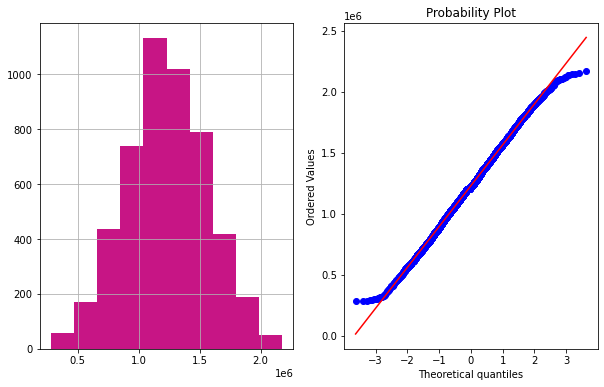

In [38]:
plot_data(df_scaled,'Price')

## Exporting Data

In [40]:
df_scaled.to_csv('USA_Housing_FT.csv', encoding='utf-8', index=False)